In [2]:
import numpy as np 
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F

In [3]:


# Define a transformação para converter a imagem em tensor
transform = transforms.Compose([transforms.ToTensor()])

# Baixa e carrega o dataset
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

In [4]:
batchsize = 256
loaderTrain = DataLoader(train_data, shuffle=True, batch_size=batchsize, drop_last=True)
loaderTest = DataLoader(test_data, batch_size=len(test_data))

In [5]:
torch.argmax(train_data[1][0], axis=1)

tensor([[ 0,  0,  0,  0,  0,  0, 19, 19, 14, 12, 11, 10,  9,  9,  7,  6,  9,  4,
          5,  6,  9, 14, 14,  0,  0,  0,  0,  0]])

In [6]:
train_data[0][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [ ]:
%whos

Variable         Type          Data/Info
----------------------------------------
DataLoader       type          <class 'torch.utils.data.dataloader.DataLoader'>
F                module        <module 'torch.nn.functio<...>/torch/nn/functional.py'>
X                Tensor        tensor([[[[0., 0., 0.,  .<...>0.,  ..., 0., 0., 0.]]]])
batchsize        int           64
createMNISTNet   function      <function createMNISTNet at 0x7d0844d4f490>
datasets         module        <module 'torchvision.data<...>on/datasets/__init__.py'>
loaderTest       DataLoader    <torch.utils.data.dataloa<...>object at 0x7d0841f2b1f0>
loaderTrain      DataLoader    <torch.utils.data.dataloa<...>object at 0x7d084493b6d0>
loss             Tensor        tensor(2.4655, grad_fn=<NllLossBackward0>)
lossfun          NLLLoss       NLLLoss()
net              ann           ann(\n  (bnIn): BatchNorm<...>eatures=10, bias=True)\n)
nn               module        <module 'torch.nn' from '<...>es/torch/nn/__init__.py'>
np   

In [ ]:
def createMNISTNet():
    class ann(nn.Module):
        def __init__(self):
            super().__init__()
            
            self.bnIn = nn.BatchNorm1d(784)
            self.input = nn.Linear(784, 64)
            
            self.bn1 = nn.BatchNorm1d(64)
            self.fc1 = nn.Linear(64,32)
            
            self.bn2 = nn.BatchNorm1d(32)
            self.fc2 = nn.Linear(32,32)
            
            self.bn3 = nn.BatchNorm1d(32)
            self.output = nn.Linear(32,10)
        
        def forward(self, x):
            x = x.view(-1,784)
            
            x = F.relu(self.bnIn(x))
            x = self.input(x)
            
            x = F.relu(self.bn1(x))
            x = self.fc1(x)
            x = F.relu(self.bn2(x))
            x = self.fc2(x)
            x = F.relu(self.bn3(x))
            
            return torch.log_softmax(self.output(x), axis=1)
    
    net = ann()
    lossfun = nn.NLLLoss()
    
    optimizer = torch.optim.Adam(net.parameters(), lr=.01)
    
    return net, lossfun, optimizer

def trainModel(net, lossfun, optimizer):
    trainAcc = []
    testAcc = []
    losses = []
    
    for epoch in range(20):
        batchAcc = []
        batchLoss = []
        net.train()
        
        for X,y in loaderTrain:
            y_pred = net(X)
            
            loss = lossfun(y_pred, y)
            batchLoss.append(loss.item())
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            acc = 100*torch.mean((torch.argmax(y_pred, axis=1) == y).float()).item()
            batchAcc.append(acc)
    
        trainAcc.append(np.mean(batchAcc))
        losses.append(np.mean(batchLoss))

        net.eval()

        X, y = next(iter(loaderTest))
        y_pred = net(X)

        testAcc.append(100*torch.mean((torch.argmax(y_pred, axis=1) == y).float()).item())
    return trainAcc, testAcc, losses
    
        
            

In [ ]:
net, lossfun, optimizer = createMNISTNet()
X,y = next(iter(loaderTrain))

y_pred = net(X)

print(y_pred)
loss = lossfun(y_pred,y)
print("Loss", loss)

tensor([[-2.6544, -2.1127, -2.5443, -2.5357, -1.8254, -2.3935, -2.4411, -1.9236,
         -2.4312, -2.5578],
        [-2.5150, -1.9772, -2.4466, -2.8169, -1.8391, -2.2482, -2.7310, -1.9582,
         -2.3151, -2.7378],
        [-2.4698, -2.0589, -2.4903, -2.1182, -2.2810, -2.7324, -2.1622, -1.7073,
         -2.6653, -2.9679],
        [-2.2311, -2.2121, -2.4298, -2.3193, -2.0529, -2.5517, -2.2435, -2.0092,
         -2.5152, -2.6682],
        [-2.3332, -1.6881, -2.4875, -2.5350, -2.2286, -2.3069, -2.5076, -2.4341,
         -2.5247, -2.3098],
        [-2.3730, -2.3884, -2.4064, -2.5835, -2.2414, -2.3053, -2.6174, -2.0520,
         -2.0555, -2.1731],
        [-2.0504, -2.3016, -2.6534, -2.1562, -1.9163, -2.5808, -2.6002, -1.9999,
         -2.4632, -2.6969],
        [-2.6258, -2.2404, -2.3087, -2.0950, -2.2719, -2.2709, -2.3388, -2.4522,
         -2.2326, -2.2768],
        [-2.0690, -2.0856, -2.3851, -2.7611, -2.1003, -2.4325, -2.7431, -2.2609,
         -2.1436, -2.3223],
        [-2.4312, -

In [ ]:
print(torch.exp(y_pred))

tensor([[0.0703, 0.1209, 0.0785, 0.0792, 0.1612, 0.0913, 0.0871, 0.1461, 0.0879,
         0.0775],
        [0.0809, 0.1385, 0.0866, 0.0598, 0.1590, 0.1056, 0.0652, 0.1411, 0.0988,
         0.0647],
        [0.0846, 0.1276, 0.0829, 0.1203, 0.1022, 0.0651, 0.1151, 0.1814, 0.0696,
         0.0514],
        [0.1074, 0.1095, 0.0881, 0.0983, 0.1284, 0.0779, 0.1061, 0.1341, 0.0808,
         0.0694],
        [0.0970, 0.1849, 0.0831, 0.0793, 0.1077, 0.0996, 0.0815, 0.0877, 0.0801,
         0.0993],
        [0.0932, 0.0918, 0.0901, 0.0755, 0.1063, 0.0997, 0.0730, 0.1285, 0.1280,
         0.1138],
        [0.1287, 0.1001, 0.0704, 0.1158, 0.1471, 0.0757, 0.0743, 0.1353, 0.0852,
         0.0674],
        [0.0724, 0.1064, 0.0994, 0.1231, 0.1031, 0.1032, 0.0964, 0.0861, 0.1072,
         0.1026],
        [0.1263, 0.1242, 0.0921, 0.0632, 0.1224, 0.0878, 0.0644, 0.1043, 0.1172,
         0.0980],
        [0.0879, 0.1251, 0.1200, 0.0516, 0.1462, 0.0827, 0.0559, 0.1217, 0.1088,
         0.1002],
        [0

In [ ]:
train, test, loss = trainModel(net, lossfun, optimizer)

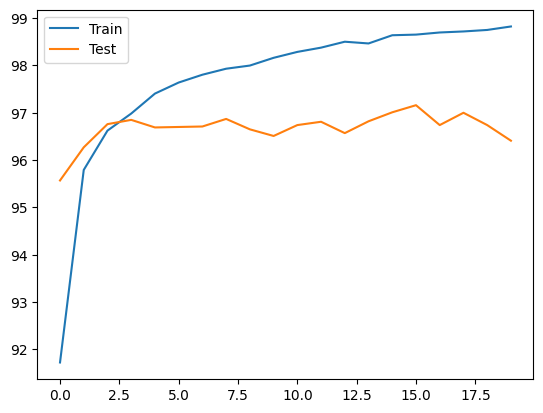

In [ ]:
plt.plot(train)
plt.plot(test)
plt.legend("Train Test".split())


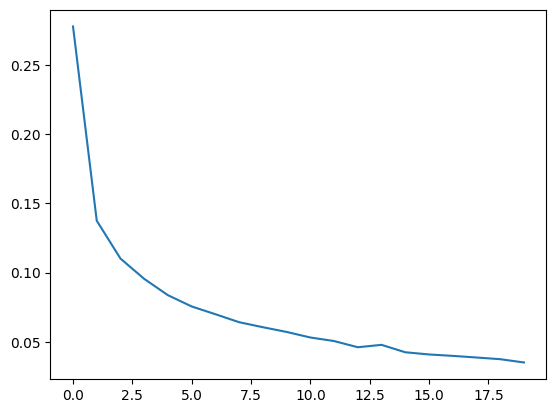

In [ ]:
plt.plot(loss)

In [ ]:
X, y = next(iter(loaderTest))
y_pred = net(X)

In [ ]:
torch.exp(y_pred[0])

tensor([9.0335e-09, 3.3330e-07, 4.1439e-06, 1.3664e-05, 7.4254e-11, 5.7307e-08,
        2.0848e-11, 9.9998e-01, 2.3488e-08, 4.2526e-06],
       grad_fn=<ExpBackward0>)